# Machine Learning algorithm to Predict the Bank Telemarketing

KAVINILAVAN MUTHUKUMAR
W9505534

In [1]:
### importing libraries
import pandas as pd  ### pandas FOR  data analysis  
import numpy as np  ### numpy for basic numerical computations 
import matplotlib.pyplot as plt  ###  plotting libraries
import seaborn as sns ### seaborn for adding more style in plotting
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("bank.csv")  ### loading csv dataset
df.head(10)  ### displaying datset of 10 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [2]:
df.shape ### finding number of rows and columns in dataset

(11162, 17)

In [3]:
df.isnull().sum()  ### finding the number of missing data in each columns

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
df.info()  ###  getting information about data types, number of unique columns and null values as well.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.columns  ###  column names

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.deposit.unique() ### finding unique values in term deposit

array(['yes', 'no'], dtype=object)

In [7]:
df.deposit.value_counts() #counting values in deposit.it is our target value it is  equally distibuted  i.e balanced dataset

no     5873
yes    5289
Name: deposit, dtype: int64

Text(0.5, 1.0, 'term deposit')

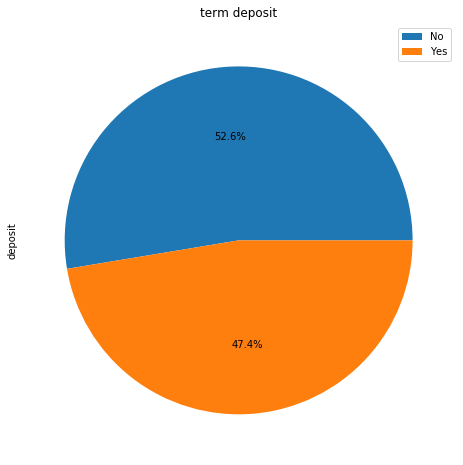

In [8]:
### Visualization of deposit value (y)
df.deposit.value_counts().plot(kind='pie',figsize=(14, 8),autopct='%1.1f%%',labels=None)  ## visualize the deposit
plt.legend(labels=("No","Yes")) # labels 
plt.title("term deposit")  # title of chart
## yes and no values are almost equally distributed. so, this is balanced dataset

In [9]:
def labels ():  ### here i creat the function for applying labels in each graphs
    x_axis=plt.gca()
    for px in x_axis.patches:
        x_axis.text(px.get_x() + px.get_width()/2, px.get_height(), '%d' % int(px.get_height()),fontsize=13,color='red',rotation = 45,ha='center',va='bottom')
  # rotate numbers to 45 degree, gives red color, fi

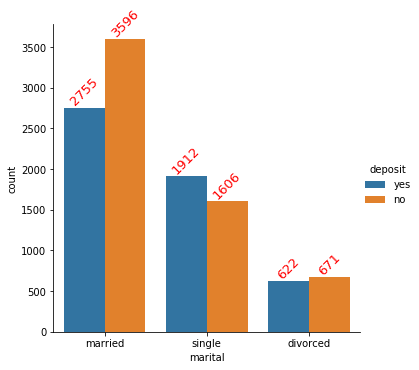

In [10]:
sns.catplot(x='marital',kind='count',hue = 'deposit',data=df)  ### comparing marital status with deposit
labels() ###  calling function for labelling

In [11]:
pd.crosstab(df['marital'], df.deposit) ### tabulation of deposit and marital status. 

deposit,no,yes
marital,,
divorced,671,622
married,3596,2755
single,1606,1912


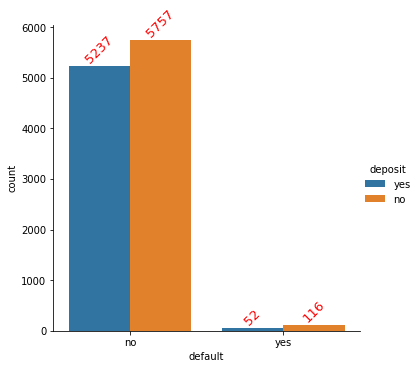

In [12]:
sns.catplot(x='default',kind='count',hue='deposit',data=df)   #### comparing default with deposit
labels()

In [13]:
pd.crosstab(df['default'], df.deposit)  ### tabulation of deposit and default

deposit,no,yes
default,,
no,5757,5237
yes,116,52


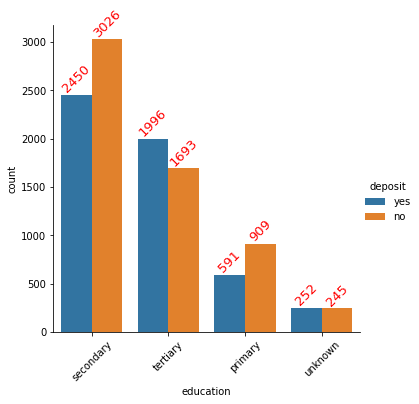

In [14]:
sns.catplot(x='education',kind='count',hue='deposit',data=df)  ### comparing education status with deposit in seaborn library
plt.xticks(rotation='45')  
labels ()

In [15]:
pd.crosstab(df['education'], df.deposit)  ### tabulation for deposit and education status. 

deposit,no,yes
education,,
primary,909,591
secondary,3026,2450
tertiary,1693,1996
unknown,245,252


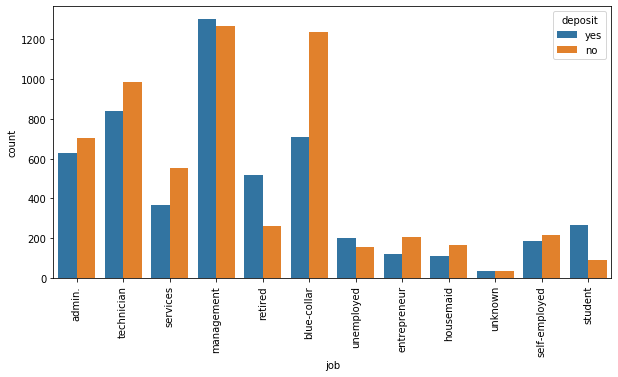

In [16]:
# comparing jobs with deposit
plt.figure(figsize=(10,5))
sns.countplot(df['job'], hue=df['deposit'])
plt.xticks(rotation='vertical')
plt.show()

In [17]:
pd.crosstab(df['job'], df.deposit)  ### tabulation for deposit and jobs. 

deposit,no,yes
job,,
admin.,703,631
blue-collar,1236,708
entrepreneur,205,123
housemaid,165,109
management,1265,1301
retired,262,516
self-employed,218,187
services,554,369
student,91,269


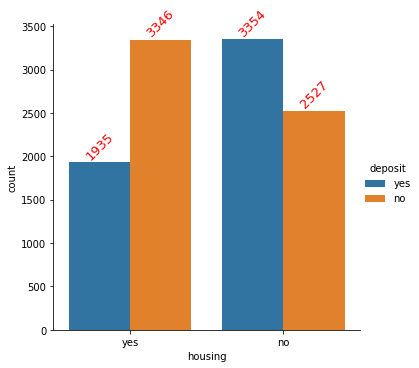

In [18]:
sns.catplot(x='housing',kind='count',hue='deposit',data=df)  ### comparing housing loan with term deposit

labels () ### calling function for labels

In [19]:
pd.crosstab(df['housing'], df.deposit) ### cross-tabulation for deposit and housing. 

deposit,no,yes
housing,,
no,2527,3354
yes,3346,1935


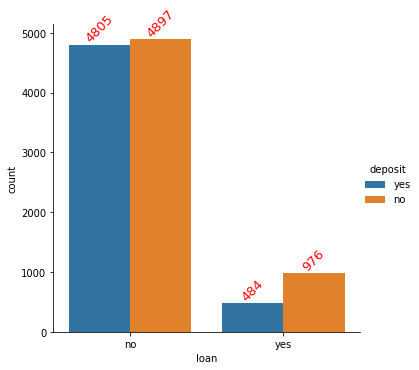

In [20]:
sns.catplot(x='loan',kind='count',hue='deposit',data=df)    #### comparing loan with term deposit

labels ()

In [21]:
pd.crosstab(df['loan'], df.deposit) ### tabulation for deposit and loan. 

deposit,no,yes
loan,,
no,4897,4805
yes,976,484


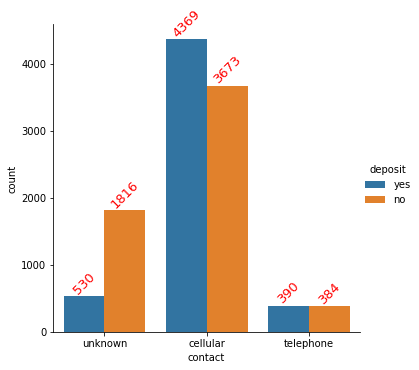

In [22]:
sns.catplot(x='contact',kind='count',hue='deposit',data=df)   ### comparing contact with term deposit

labels ()  ### calling function for labeling

In [23]:
pd.crosstab(df['contact'], df.deposit)   ### tabulation for deposit and contact. 

deposit,no,yes
contact,,
cellular,3673,4369
telephone,384,390
unknown,1816,530


In [24]:
df.columns.unique() ### finding the list of columns in our dataset

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

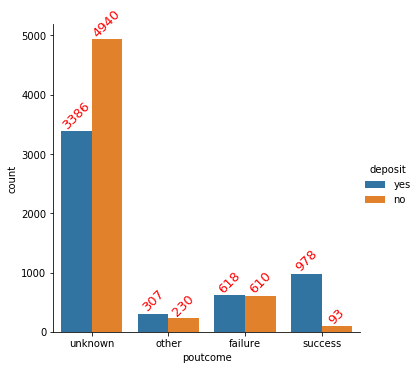

In [25]:
sns.catplot(x='poutcome',kind='count',hue='deposit',data=df)  ### comparing poutcome with term deposit

labels ()

In [26]:
pd.crosstab(df['poutcome'], df.deposit)  ### tabulation for deposit and poutcome. 

deposit,no,yes
poutcome,,
failure,610,618
other,230,307
success,93,978
unknown,4940,3386


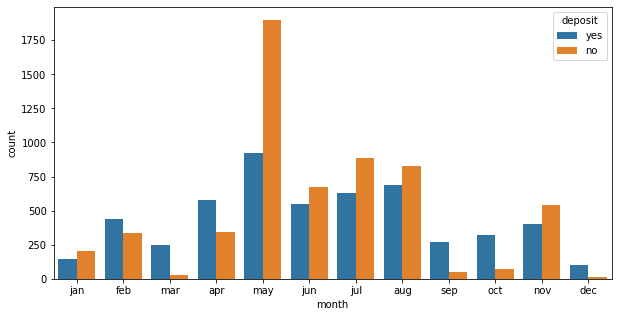

In [27]:
### comparing month with deposit
plt.figure(figsize=(10,5))
sns.countplot(df['month'], order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], hue=df['deposit'])
plt.show()

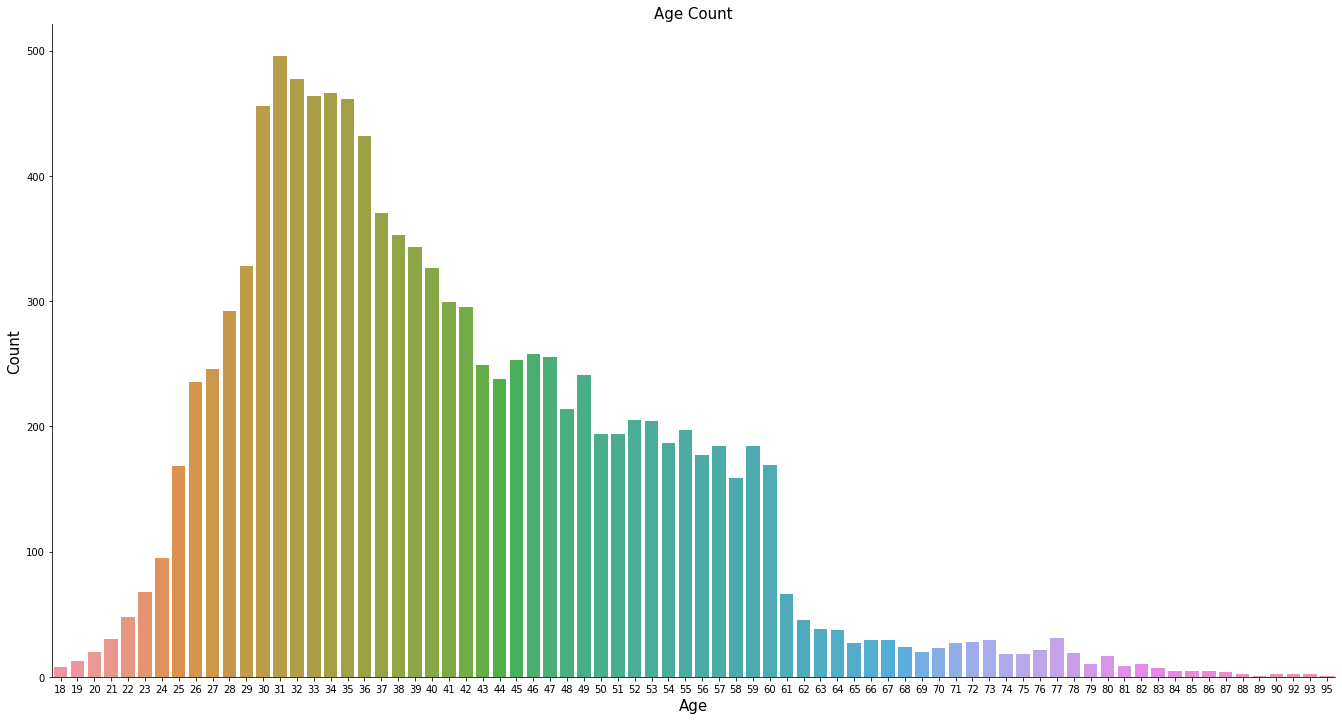

In [28]:
 ### distribution of age
fig, axis = plt.subplots()  
fig.set_size_inches(23, 12) ### size of chart
sns.countplot(x = 'age', data = df) ### countplot, age from 18 to 95
axis.set_xlabel('Age', fontsize=15) ### x axis
axis.set_ylabel('Count', fontsize=15) ###  y axis
axis.set_title('Age Count', fontsize=15) ### title of this chart 
sns.despine()
# bank has more customers in the age between 30 to 35

In [29]:
df.duration.unique() ### finding unique value in duration

array([1042, 1467, 1389, ..., 1504,  818, 1812], dtype=int64)

In [30]:
df.duration.max() ## finding maximum value in duration

3881

In [31]:
df.duration.min() ### finding minimum value in duration

2

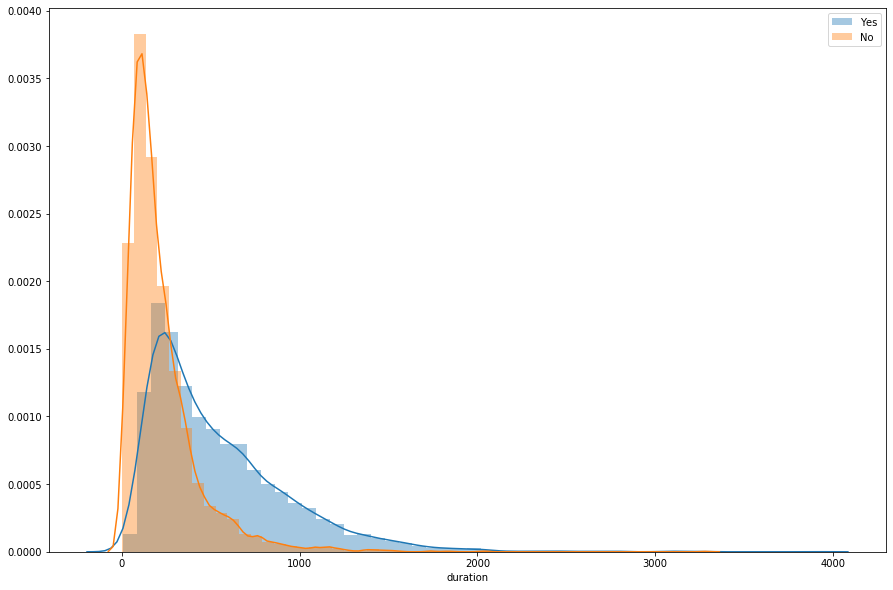

In [32]:
### comparing duration and deposit
plt.figure(figsize=(15,10))
sns.distplot(df[df['deposit']=='yes']['duration']) ### plotting yes values
sns.distplot(df[df['deposit']=='no']['duration']) ### plotting no values
plt.legend(labels=['Yes','No']) ## labels

plt.show()

In [33]:
df.previous.unique()

array([ 0,  1,  4,  2,  3, 10,  7,  9,  5, 29,  6, 13, 17,  8, 11, 30, 22,
       58, 21, 14, 26, 12, 19, 55, 23, 15, 20, 27, 16, 41, 40, 28, 18, 37],
      dtype=int64)

In [34]:
### replacing categories into numerical for fitting ml module
### inplace true for make changes permenently
df.contact.replace(('telephone','unknown','cellular',),(1,3,2),inplace=True)
df.housing.replace(('no','yes'),(2,1),inplace=True)
df.month.replace(( 'jan', 'feb', 'mar', 'apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df.poutcome.replace(('unknown', 'other', 'failure', 'success'),(1,2,4,3),inplace=True)
df.job.replace(('housemaid', 'services', 'admin.', 'blue-collar', 'technician','retired', 'management', 'unemployed', 'self-employed', 'unknown','entrepreneur', 'student'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace= True) 
df.education.replace(('secondary', 'tertiary', 'primary', 'unknown'),(1,2,3,4),inplace= True)
df.loan.replace(('yes','no'),(1,2),inplace=True)

In [35]:
df.default.replace(('yes','no'),(1,2),inplace=True) # replacing default values

In [36]:
df.marital.replace(('married','single','divorced'),(1,2,3),inplace=True) # replacing maritalvalues

In [37]:
df.deposit.replace(('no','yes',),(0,1),inplace=True) # replacing deposit values

In [38]:
df.head() ### every categories value changed into numerical

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,3,1,1,2,2343,1,2,3,5,5,1042,1,-1,0,1,1
1,56,3,1,1,2,45,2,2,3,5,5,1467,1,-1,0,1,1
2,41,5,1,1,2,1270,1,2,3,5,5,1389,1,-1,0,1,1
3,55,2,1,1,2,2476,1,2,3,5,5,579,1,-1,0,1,1
4,54,3,1,2,2,184,2,2,3,5,5,673,2,-1,0,1,1


# FEATURE SELECTION


In [39]:
from sklearn.feature_selection import VarianceThreshold  ### importing variance threshold for finding constant values
var_thr=VarianceThreshold(threshold=0.0) #### fixing threshold for constant values as 0
var_thr.fit(df)  ### fitting the dataset

VarianceThreshold()

In [40]:
var_thr.get_support() ###  true means there is no constant values in our dataset so no need to remove columns
### if there is any false, i have to remove that values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [41]:
df.columns ### getting columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [42]:
X= df.drop(['deposit'],axis='columns') ### assigning independent features
y=df.deposit  ### assigning dependent features


In [43]:
from sklearn.model_selection import train_test_split   ### splitting data for train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)   ### 30 % of data for testing 

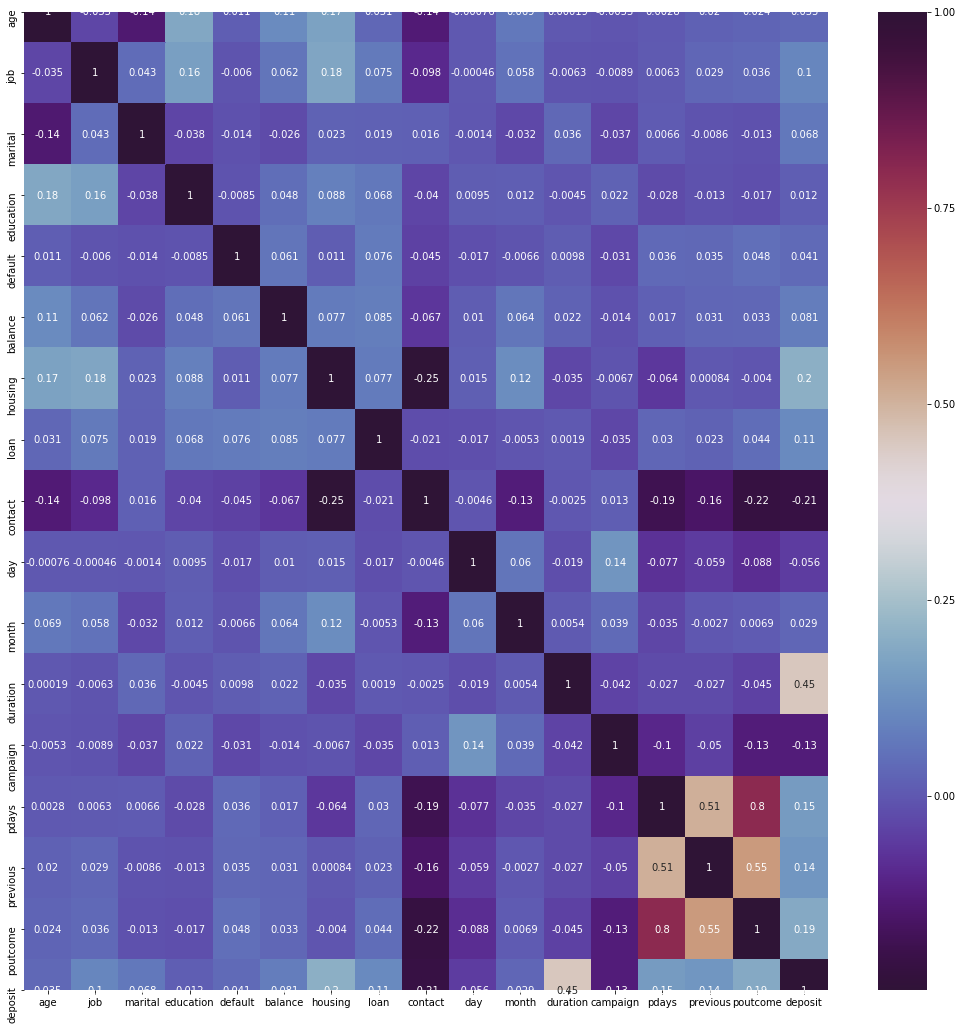

In [44]:
### finding correlation between each other 
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap= 'twilight_shifted') ### plotting corelated values using heatmap

In [45]:

### function for getting high variables of indepentent features 
def correlation(dataset, threshold):
    col_corr = set()  ### creat a set for place a corelated columns
    co_pearson = dataset.corr()
    for i in range(len(co_pearson.columns)):
        for j in range(i):
            if abs (co_pearson.iloc[i, j]) > threshold: ### abs for negative corelation
                colname = co_pearson.columns[i]    
                col_corr.add(colname)
    return col_corr

In [47]:
co_columns = correlation(X_train, 0.7) ### fixing threshold value as 70%
len(set(corr_columns))  ### total number of corelation in set

1

In [48]:
co_columns ### poutcome and pdays are two independent features are highly corelated with 0.80. so i either use one to get 
            ## more accuracy

{'poutcome'}

In [49]:
# here, i plan to remove poutcome
X_train.drop(co_columns,axis=1,inplace = True) ### drop the highly corelation column in x_test
X_test.drop(co_columns,axis=1, inplace = True)### drop the highly corelation column in x_test

In [51]:
x_trainfs=X_train #### assigning selected training features with x_trainfs

In [52]:
x_testfs=X_test  #### assigning selected testing feature with x_testfs

In [55]:
from sklearn.feature_selection import mutual_info_classif
# finding the mutual information for selecting features
### higher values mean higher dependency and lower values means lower dependency
mutual_info = mutual_info_classif(x_trainfs, y_train,random_state=42)
mutual_info

array([0.01007795, 0.01335753, 0.00774361, 0.00794477, 0.00346455,
       0.03819699, 0.01029263, 0.00551776, 0.02705115, 0.01640792,
       0.05626162, 0.1587881 , 0.00558385, 0.05115196, 0.02695392])

In [56]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

duration     0.158788
month        0.056262
pdays        0.051152
balance      0.038197
contact      0.027051
previous     0.026954
day          0.016408
job          0.013358
housing      0.010293
age          0.010078
education    0.007945
marital      0.007744
campaign     0.005584
loan         0.005518
default      0.003465
dtype: float64

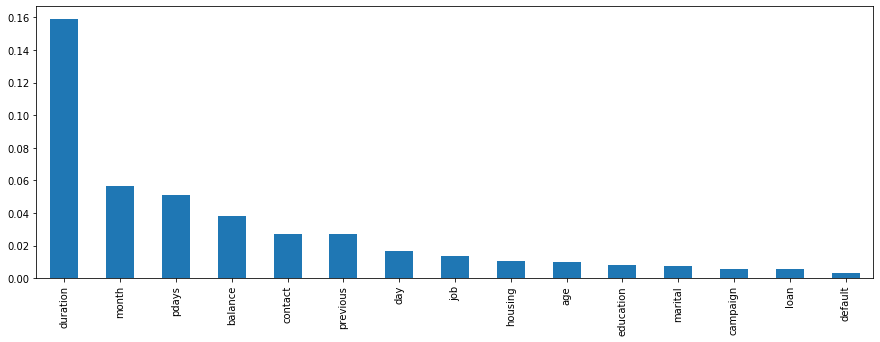

In [57]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5)) ### plotting from high dependency to low dependency values 

### duration column is highly dependency with our target column. thus, duration is more useful than other to    predtict outcome.
### moreover, some colums are low dependency with target.
### according to Domain knowledge each and every columns in our dataset is useful for predict output.
### so, i removed only poutcome (input) which is highly corelated with pdays(input) 


# #  random forest

In [59]:

from sklearn.ensemble import RandomForestClassifier   ### import random forest classifier algorithum

In [60]:

from sklearn.model_selection import RandomizedSearchCV  ### hyperparameter tuning for selecting perfect parameters

In [61]:

n_estimators = [int(x) for x in np.linspace(start = 20 , stop = 1000, num = 5)] ## number of trees
max_features = ['auto','sqrt', 'log2'] ### max number of features to taken for each split  
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)] ### max_depth indicates the depth of each tree in the forest.
min_samples_split = [2,4,5,6,7,8, 10]   ### it indicates minimum number of split
min_samples_leaf=[1,2,3,4,5,6] ### it indicates minimum number of samples that should be present in the leaf node .
criterion  = ['gini', 'entropy']   ### quality of split
## assign values in dictionary for hyperparameter tuning.

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'min_samples_split':min_samples_split,
          
               'min_samples_leaf':min_samples_leaf,
          
                'criterion' : criterion
          
          
         }
print(r_grid)

{'n_estimators': [20, 265, 510, 755, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 23, 45], 'min_samples_split': [2, 4, 5, 6, 7, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy']}


In [ ]:
# n_iter(200) * cv(4) = 800 fits

# n_iter = number of iteration

# cv = cross validation

In [62]:

rf = RandomForestClassifier()
### fitting randomsearch CV, it takes 800 fits
rf_randomcv= RandomizedSearchCV(estimator=rf, param_distributions=r_grid, n_iter = 200, cv = 4, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)
rf_randomcv.fit(x_trainfs,y_train) ### fitting model for finding perfect parameters

Fitting 4 folds for each of 200 candidates, totalling 800 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 4, 5, 6, 7, 8,
                                                              10],
                                        'n_estimators': [20, 265, 510, 755,
                                                         1000]},
                   random_state=42, return_train_score=True, verbose=2)

In [63]:
print(rf_randomcv.best_params_) ## this is the best parameter to achieve max accuracy  

{'n_estimators': 755, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 45, 'criterion': 'gini'}


In [64]:
print(rf_randomcv.best_estimator_) 

RandomForestClassifier(max_depth=45, min_samples_split=6, n_estimators=755)


In [65]:
rf_randomcv.best_score_



0.8480739287273443

In [66]:
### fitting random forest model with best parameter which randomsearch CV gives
rforest = RandomForestClassifier(max_depth=45, max_features='auto', min_samples_split=6,min_samples_leaf= 1, 
                       n_estimators=755)
rforest.fit(x_trainfs, y_train)

RandomForestClassifier(max_depth=45, min_samples_split=6, n_estimators=755)

In [67]:
###  importing confusion matrix for  evaluating  the accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [68]:
y_predrf = rforest.predict(x_testfs)## assigning y_prediction for getting accuracy
con_matrix = confusion_matrix(y_test, y_predrf) ### confusion matrix
print("Confusion Matrix:")
print(con_matrix )
class_report = classification_report(y_test, y_predrf) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(y_test,y_predrf) ### accuracy score
print("Accuracy:",acc_score)

Confusion Matrix:
[[1412  330]
 [ 199 1408]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1742
           1       0.81      0.88      0.84      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

Accuracy: 0.8420424007166318


# SCALING

In [69]:
### scaling the data using standard scalar from sklearn for svm model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_trainfs) ### transform x_trainfs
x_test_s = scaler.transform(x_testfs) ### transform x_testfs


# svmodel

In [70]:
### importing svc library
from sklearn.svm import SVC

In [71]:

svmodel = SVC()
svmodel.fit(x_train_s,y_train) ## training the svm model with standard scalar


SVC()

In [72]:

y_pred_svm = svmodel.predict(x_test_s)
con_matrix = confusion_matrix(y_test, y_pred_svm) ### confusion matrix
print("Confusion Matrix:")
print(con_matrix )
class_report = classification_report(y_test, y_pred_svm) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(y_test,y_pred_svm)  ### accuracy score
print("Accuracy:",acc_score)

Confusion Matrix:
[[1409  333]
 [ 283 1324]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1742
           1       0.80      0.82      0.81      1607

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Accuracy: 0.8160644968647357


# xg boosting

In [73]:
### importing XG boosting
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [74]:
xgb=xgboost.XGBClassifier()

In [75]:
### xg boost parameter for randomizedsearch cv
par_xgb={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
print(par_xgb)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}


In [ ]:
# n_iter(100) * cv(5) = 500 fits

# n_iter = number of iteration

# cv = cross validation

In [76]:
xgb=xgboost.XGBClassifier()
### fitting randomsearch cv, it makes 500 fits
xgb= RandomizedSearchCV(estimator=xgb, param_distributions=par_xgb, n_iter=100,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
xgb.fit(x_trainfs, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[20:49:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [77]:
xgb.best_params_  ### best parameters for achieving max accuracy for xg boost

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [78]:
xgb.best_score_ ### best score 

0.9228384689044148

In [79]:
xgb.best_estimator_ ### best estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
### fitting xg boosting model with best parameters 

xgbboost =xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgbboost.fit(X_train, y_train) ### training xgboost

[21:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:

y_predxgb= xgbboost.predict(x_testfs) ## asign Y_prediction for accuracy calculation
con_matrix = confusion_matrix(y_test, y_predxgb) ### confusion matrix
print("Confusion Matrix:")
print(con_matrix )
class_report = classification_report(y_test, y_predxgb) ###  classification report
print("Classification Report:")
print (class_report)
acc_score = accuracy_score(y_test,y_predxgb) ### accuracy score

print("Accuracy:",acc_score)

Confusion Matrix:
[[1454  288]
 [ 212 1395]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1742
           1       0.83      0.87      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

Accuracy: 0.8507017020005972
